In [1]:
import xarray as xr

In [2]:
pip install xarray

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install netcdf4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
ds = xr.open_dataset("../data_process/11_frost_days-projections-yearly-rcp_4_5-wrf381p-ipsl_cm5a_mr-r1i1p1-grid-v1.0.nc", engine="netcdf4")

In [7]:
ds

<xarray.Dataset> Size: 60MB
Dimensions:            (time: 150, lat: 185, lon: 271)
Coordinates:
  * time               (time) datetime64[ns] 1kB 1951-01-01 ... 2100-01-01
  * lat                (lat) float64 1kB 26.5 26.75 27.0 ... 72.0 72.25 72.5
  * lon                (lon) float64 2kB -22.0 -21.75 -21.5 ... 45.0 45.25 45.5
    height             float64 8B ...
Data variables:
    tasAdjust_NON_CDM  (time, lat, lon) float64 60MB ...

In [13]:
temperature = ds['tasAdjust_NON_CDM']
print(temperature)

<xarray.DataArray 'tasAdjust_NON_CDM' (time: 150, lat: 185, lon: 271)> Size: 60MB
[7520250 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1kB 1951-01-01 1952-01-01 ... 2100-01-01
  * lat      (lat) float64 1kB 26.5 26.75 27.0 27.25 ... 71.75 72.0 72.25 72.5
  * lon      (lon) float64 2kB -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
    height   float64 8B ...
Attributes:
    units:            K
    comment:          derived from 3 hourly SIS Energy projections
    ensemble_member:  r1i1p1
    gcm:              ipsl_cm5a_mr
    rcm:              wrf381p
    scenario:         rcp_4_5


In [14]:
region_data = temperature.sel(lat=slice(30, 50), lon=slice(-10, 10))
print(region_data)

<xarray.DataArray 'tasAdjust_NON_CDM' (time: 150, lat: 81, lon: 81)> Size: 8MB
[984150 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1kB 1951-01-01 1952-01-01 ... 2100-01-01
  * lat      (lat) float64 648B 30.0 30.25 30.5 30.75 ... 49.25 49.5 49.75 50.0
  * lon      (lon) float64 648B -10.0 -9.75 -9.5 -9.25 ... 9.25 9.5 9.75 10.0
    height   float64 8B ...
Attributes:
    units:            K
    comment:          derived from 3 hourly SIS Energy projections
    ensemble_member:  r1i1p1
    gcm:              ipsl_cm5a_mr
    rcm:              wrf381p
    scenario:         rcp_4_5


In [15]:
temp_at_location = temperature.sel(lat=50.0, lon=10.0, method='nearest')
print(temp_at_location)

<xarray.DataArray 'tasAdjust_NON_CDM' (time: 150)> Size: 1kB
[150 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1kB 1951-01-01 1952-01-01 ... 2100-01-01
    lat      float64 8B 50.0
    lon      float64 8B 10.0
    height   float64 8B ...
Attributes:
    units:            K
    comment:          derived from 3 hourly SIS Energy projections
    ensemble_member:  r1i1p1
    gcm:              ipsl_cm5a_mr
    rcm:              wrf381p
    scenario:         rcp_4_5


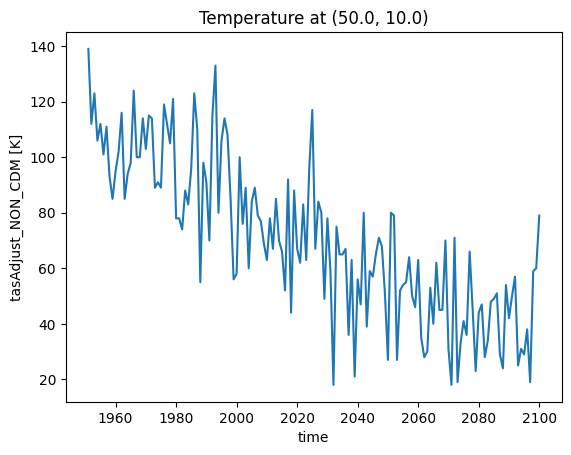

In [17]:
import matplotlib.pyplot as plt

temp_at_location = temperature.sel(lat=50.0, lon=10.0, method='nearest')
temp_at_location.plot()
plt.title('Temperature at (50.0, 10.0)')
plt.show()

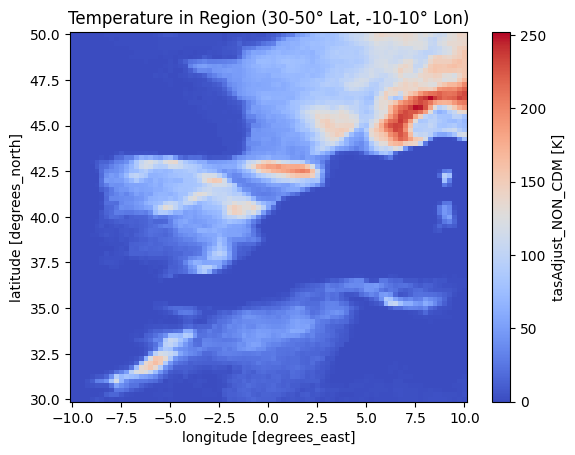

In [19]:
data_region = ds['tasAdjust_NON_CDM'].isel(time=0).sel(lat=slice(30, 50), lon=slice(-10, 10))
data_region.plot(cmap='coolwarm')
plt.title("Temperature in Region (30-50° Lat, -10-10° Lon)")
plt.show()